In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import ujson as json
import glob as g
import random as rnd
import os.path as op
import time
import math
import numpy as np
from skimage import io, transform
import skimage.color as skc

from tqdm import tqdm

import pandas as pd
import seaborn as sns

import multiprocessing
import hashlib as hl
import scipy.spatial.distance as sd

In [43]:
with open('/media/jakob/bigdata/train/cat_export/SB.json') as cat_file:
    catalog = json.load(cat_file)

In [44]:
page = catalog['pages'][2]

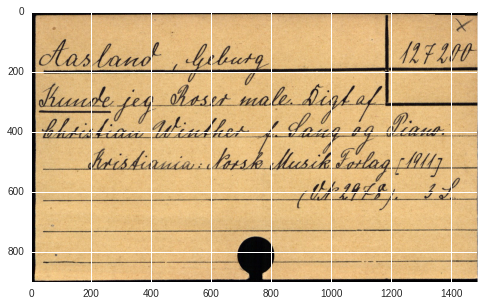

In [45]:
plt.imshow(img)

In [94]:
def cropped_img(img, box, margin):
    height, width, n_channels = img.shape
    y_min = max(height - box[3] - margin, 0)
    y_max = min(height - box[1] + margin, height)
    x_min = max(box[0] - margin, 0)
    x_max = min(box[2] + margin, width)
    return img[y_min:y_max, x_min:x_max,:]
    
def extract_img_lines(catalog, margin=3):
    for page in tqdm(catalog['pages']):
        img_path  = op.join(catalog['path'], page['path'])
        img = io.imread(img_path + '.jpg')
        for line in page['lines']:
            box = line['position']
            line_img = cropped_img(img, box, margin)
            line_path = op.join(img_path, line['name']) + '.png'
            io.imsave(line_path, line_img)

In [95]:
for cat_json in g.glob('/media/jakob/bigdata/train/cat_export/*.json'):
    print cat_json
    with open(cat_json) as cat_file:
        catalog = json.load(cat_file)
        extract_img_lines(catalog)

/media/jakob/bigdata/train/cat_export/SB.json


  0%|          | 0/797 [00:00<?, ?it/s]

/media/jakob/bigdata/train/cat_export/SC.json


  0%|          | 1/780 [00:00<01:57,  6.62it/s]

/media/jakob/bigdata/train/cat_export/SE.json


  0%|          | 0/18436 [00:00<?, ?it/s]

/media/jakob/bigdata/train/cat_export/S.json


  0%|          | 0/294 [00:00<?, ?it/s]

/media/jakob/bigdata/train/cat_export/SD.json


100%|██████████| 294/294 [01:04<00:00,  3.27it/s]
